In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper import categorical_summarized
from helper import quantitative_summarized

# Contents
TODO

# Reading in the data

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data', 'titanic')

In [3]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

## Peak into the data

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1. Categorical Analysis

# Target Variable: Survival

In [7]:
c_palette = ['tab:blue', 'tab:orange']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
mode:  0    0
dtype: int64
0    549
1    342
Name: Survived, dtype: int64


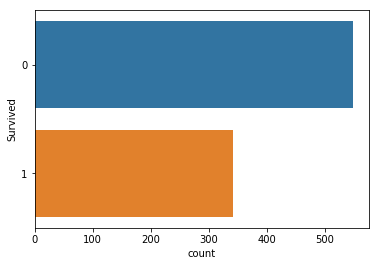

In [8]:
categorical_summarized(train_df, y = 'Survived', palette=c_palette)

# Gender

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
mode:  0    male
dtype: object
male      577
female    314
Name: Sex, dtype: int64


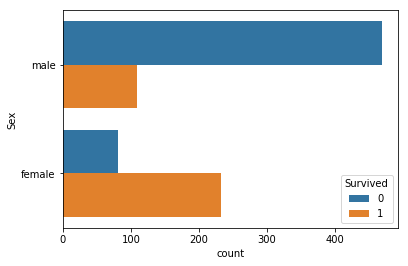

In [26]:
categorical_summarized(train_df, y = 'Sex', hue='Survived', palette=c_palette)

# Embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
mode:  0    S
dtype: object
S    644
C    168
Q     77
Name: Embarked, dtype: int64


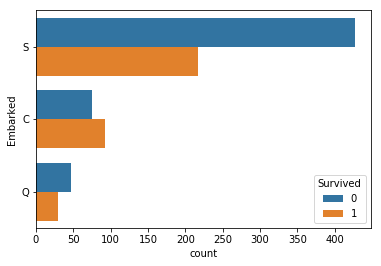

In [27]:
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']
categorical_summarized(train_df, y = 'Embarked', palette=c_palette3, hue = 'Survived')

# 2. Quantitative Analysis

# Age

In [37]:
c_palette = ['tab:blue', 'tab:orange']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


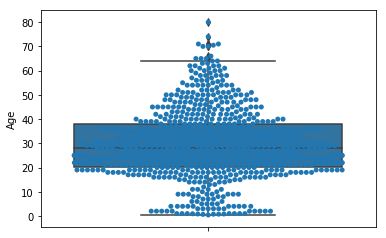

In [38]:
# univariate analysis
quantitative_summarized(dataframe= train_df, y = 'Age', palette=c_palette, verbose=False, swarm=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


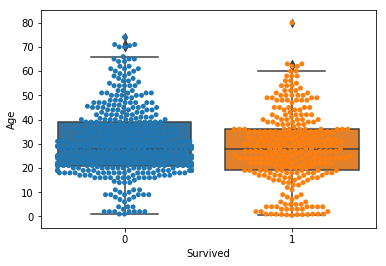

In [39]:
# bivariate analysis with target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Survived', palette=c_palette, verbose=False, swarm=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


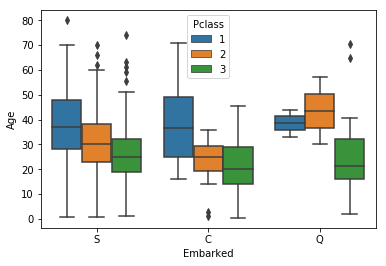

In [43]:
# multivariate analysis with Embarked variable and Pclass variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Pclass', palette=c_palette3, verbose=False, swarm=False)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


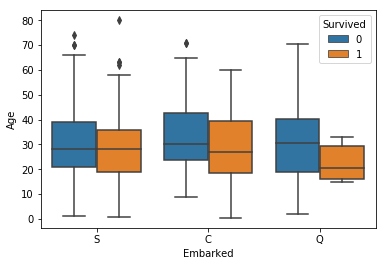

In [40]:
# multivariate analysis with Embarked variable and target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Survived', palette=c_palette, verbose=False, swarm=False)

# Parent Child (Parch)

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
mode:  0    0
dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


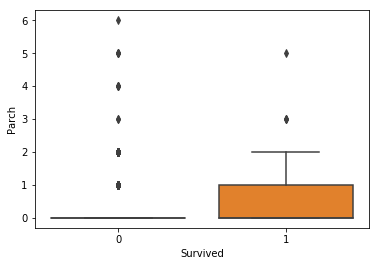

In [24]:
quantitative_summarized(dataframe=train_df, y = 'Parch', x = 'Survived', palette=c_palette3, verbose=True, swarm=False)

# Siblings Spouse (SibSp)

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
mode:  0    0
dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


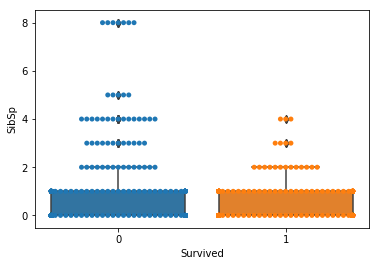

In [15]:
quantitative_summarized(dataframe=train_df, y = 'SibSp', x = 'Survived', palette=c_palette3, verbose=True, swarm=True)

# Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
mode:  0    8.05
dtype: float64


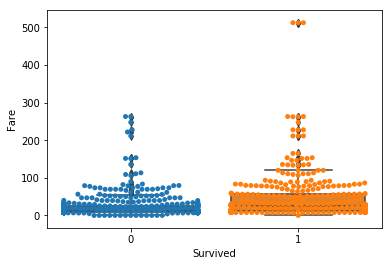

In [29]:
quantitative_summarized(dataframe=train_df, y = 'Fare', x = 'Survived', palette=c_palette, verbose=False, swarm=True)

# Pair plots

/home/renjie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/renjie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

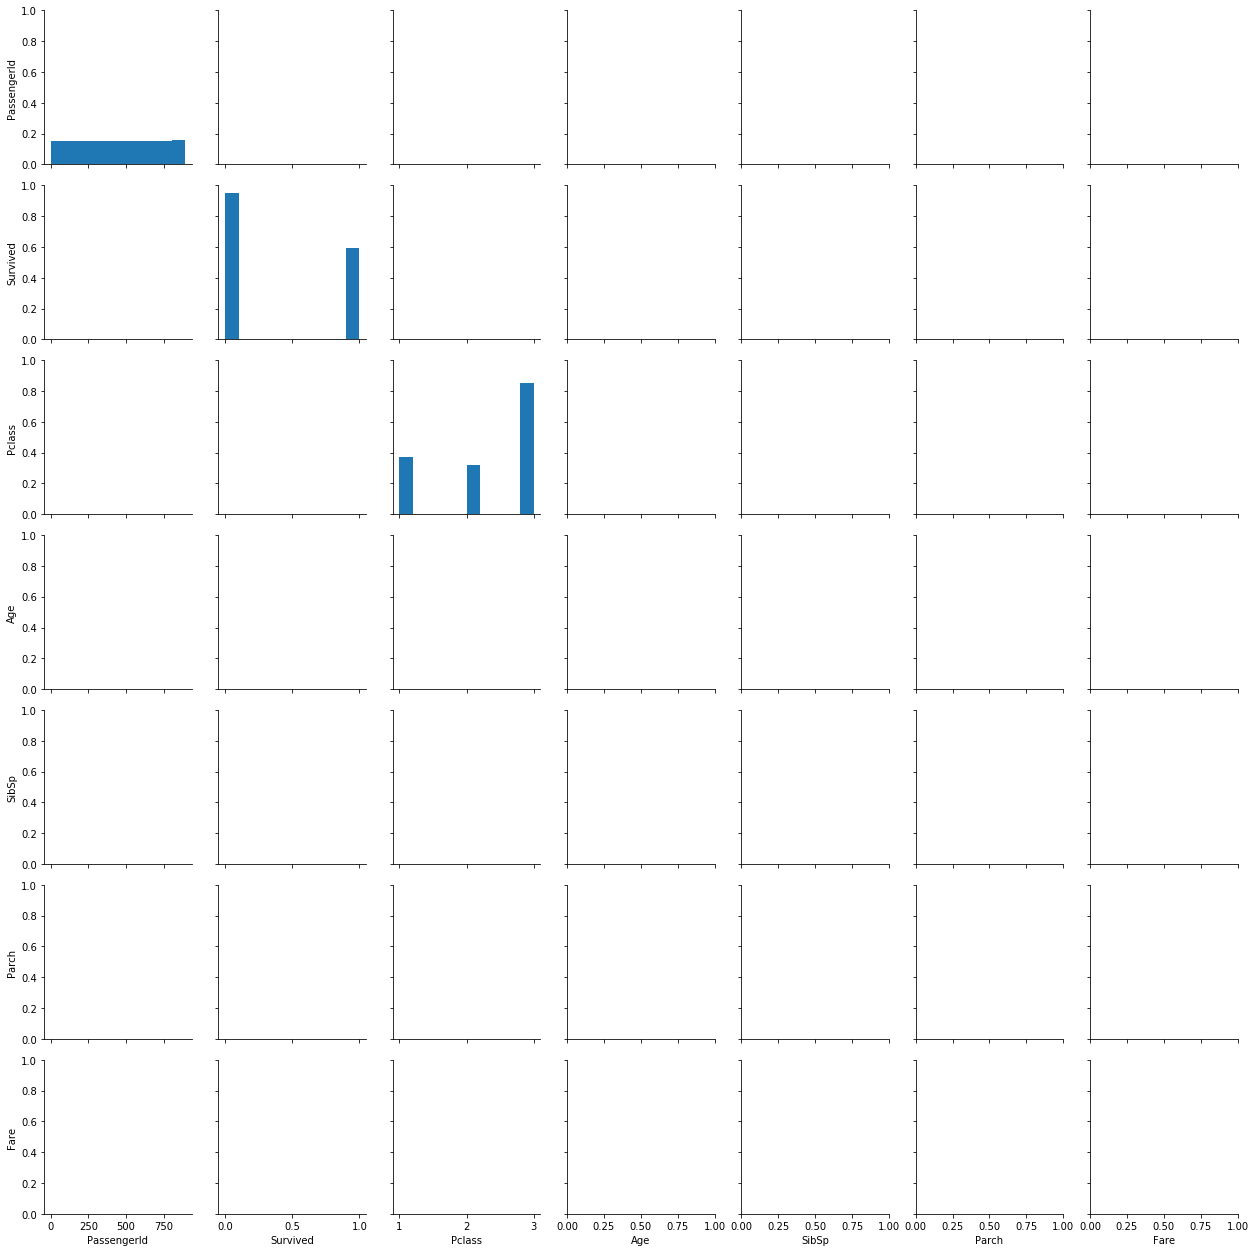

In [44]:
sns.pairplot(train_df)

# 4. Feature Selection

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
def simple_preprocessing(train_df):
    X_train = train_df.drop(['Survived', 'PassengerId', 'Cabin', 'Name', 'Ticket'], axis = 1)
    X_train['Age'] = X_train['Age'].fillna(value=X_train['Age'].mean())
    X_train['Embarked'] = X_train['Embarked'].fillna(value=X_train['Embarked'].mode())
    X_train = pd.get_dummies(X_train, columns = ['Pclass', 'Sex', 'Embarked'])
    y_train = train_df['Survived']
    y_train = pd.get_dummies(y_train, columns = ['Survived'])
    return X_train, y_train

In [58]:
X_train, y_train = simple_preprocessing(train_df)

In [59]:
clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(X_train, y_train)
rf_y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

NameError: name 'X_test' is not defined

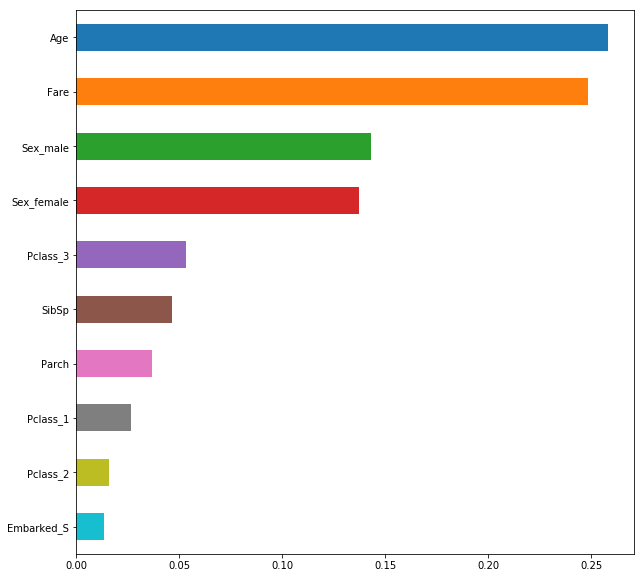

In [60]:
pd.Series(clf.feature_importances_, index = X_train.columns).nlargest(10).plot(kind = 'barh', figsize = (10, 10)).invert_yaxis();